<a href="https://colab.research.google.com/github/eunjoo-ny/ML-Code/blob/main/4_Lesson_4_Image_Classification_with_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split


In [5]:
project_name='05-cifar10-cnn'

In [6]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

In [7]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
  tar.extractall(path='./data')

In [11]:
data_dir = './data/cifar10'
print(os.listdir(data_dir ))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'test']
['truck', 'airplane', 'cat', 'deer', 'horse', 'automobile', 'dog', 'frog', 'ship', 'bird']


In [12]:
airplane_files = os.listdir(data_dir +"/train/airplane")
print('No. of training examples for airplanes:',len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['3073.png', '3945.png', '1341.png', '2948.png', '4330.png']


In [13]:
ship_test_files = os.listdir(data_dir +"/test/ship")
print("No. of test examples for ship:",len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['0725.png', '0902.png', '0852.png', '0752.png', '0707.png']


In [14]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [15]:
dataset =ImageFolder(data_dir+ '/train', transform =ToTensor())

In [16]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [17]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [18]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor']='#ffffff'

In [19]:
def show_example(img,label):
  print('Label:',dataset.classes[label], "("+str(label)+")")
  plt.imshow(img.permute(1,2,0))

Label: airplane (0)


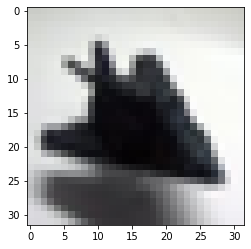

In [20]:
show_example(*dataset[0])

Label: airplane (0)


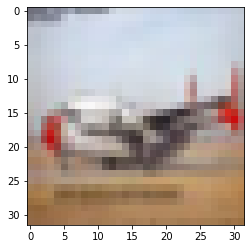

In [21]:
show_example(*dataset[1099])

Label: airplane (0)


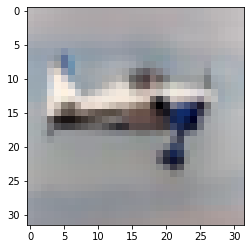

In [22]:
show_example(*dataset[237])

In [23]:
!pip install jovian --upgrade -q

     |████████████████████████████████| 71kB 7.0MB/s 


In [24]:
import jovian

In [25]:
jovian.commit(project='05-cifar10-cnn')

[jovian] Detected Colab notebook...


[jovian] Error: Colab File Id is not provided. Make sure to execute the cell where the Id is set.


# New Section